In [1]:
# import the urllib library
import urllib.request
from datetime import date
import numpy as np
import matplotlib.pyplot as plt 
from GHCND import *

In [2]:
ghn = GHNCD()
ghn.readCountriesFile()
ghn.readStationsFile()

Read 219 countries and codes
Read 991 stations with justGSN


In [3]:

# Get list of station names
station_names = ghn.getStatKeyNames()

# get url for a given station index
whichStat1 = 500
fileName = station_names[whichStat1]+'.dly'
urlName = 'http://www.hep.ucl.ac.uk/undergrad/0056/other/projects/ghcnd/ghcnd_gsn/' + fileName

# copy station data from remote to local
destination = f"data/{fileName}"
urllib.request.urlretrieve(urlName, destination)
statDict1 = ghn.processFile(destination)
print(ghn.getStation(station_names[whichStat1]))

# get url for a given station index
whichStat2 = 100
fileName = station_names[whichStat2]+'.dly'
urlName = 'http://www.hep.ucl.ac.uk/undergrad/0056/other/projects/ghcnd/ghcnd_gsn/' + fileName

# copy station data from remote to local
destination = f"data/{fileName}"
urllib.request.urlretrieve(urlName, destination)
statDict2 = ghn.processFile(destination)
print(ghn.getStation(station_names[whichStat2]))


KS000047112 is INCHEON, Korea, South at 37.467 126.633 70.0
ASN00076031 is MILDURA AIRPORT, Australia at -34.2358 142.0867 50.0


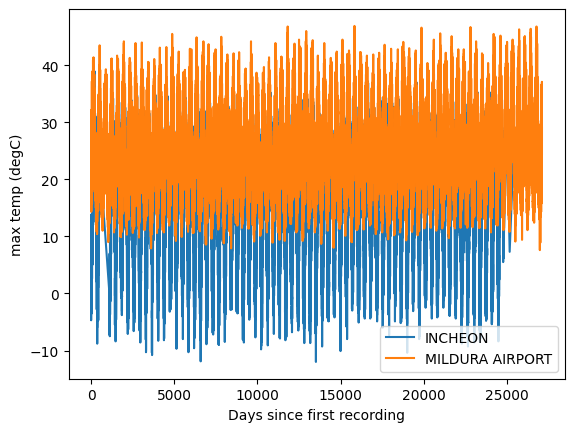

In [9]:
var1 = Variable(ghn.getVar(statDict1, 'TMAX'), "max temp (degC)", ghn.stationDict[station_names[whichStat1]].name)
var1.convert_time()

var2 = Variable(ghn.getVar(statDict2, 'TMAX'), "max temp (degC)", ghn.stationDict[station_names[whichStat2]].name)
var2.convert_time()

fig, ax = plt.subplots()
ax.plot(var1.get_dates(), var1.get_vals())
ax.plot(var2.get_dates(), var2.get_vals())
ax.set_xlabel("Days since first recording")
ax.set_ylabel(f"{var1.get_label()}")
ax.legend((var1.get_station(), var2.get_station()))
